In [84]:
import pandas as pd
import plotly as plt
import os
import glob
import plotly.express as px
import numpy as np
# Goal : Histogramme des personnes ayant été reçus ou non et dans quelle formation (BTS / Droit / Art / Inge / Commerce / Pro / Autre ?)
# 
pd.set_option('display.max_columns', None)

    
def open_and_concat_df():
    
    path = os.path.join(os.getcwd(), 'data')
    path = os.path.join(path, '*.csv')
    files = glob.glob(path)
    return pd.concat((pd.read_csv(i, sep = ';') for i in files))

def remove_nan_int(df, list_column):
    for s in list_column:
        df[s] = df[s].replace(np.nan, 0)
    return df

def remove_nan_str(df, list_column): 
    for s in list_column:
        df[s] = df[s].replace(np.nan, '')
    return df

def remove_unknown(df):
    for column in df.columns[1:]:
        if df[column].dtype == 'object':
            df[column] = df[column].replace('inconnu', '0')
    return df

def remove_NaNs_and_unknown(dataframe):
    lenD = len(dataframe.columns)
    for i in range (lenD):
        dataframe.iloc[:, i] = dataframe.iloc[:, i].replace('inconnu', '0')
        try:
            dataframe.iloc[:, i] = dataframe.iloc[:, i].replace(np.nan, 0)
            dataframe.iloc[:, i] = dataframe.iloc[:, i].astype('int64')
        except:
            dataframe.iloc[:, i] = dataframe.iloc[:, i].replace(0, '')
    return dataframe


dataframe = open_and_concat_df()
dataframe = remove_unknown(dataframe)

dataframe.rename(columns = {'Effectif total des candidats ayant accepté la proposition de l’établissement (admis)' : 'Candidats admis parcoursup'}, inplace = True)
dataframe.rename(columns = {'Effectif total des candidats admis' : 'Candidats admis APB'}, inplace = True)
dataframe.rename(columns = {'Effectif total des candidats' : 'Effectif total des candidatures'}, inplace = True)

#dataframe = remove_nan_int(dataframe, ['Candidats admis APB', 'Départements'])
#dataframe = remove_nan_str(dataframe, ['Candidats admis parcoursup', 'Filières de formations', 'Filière de formation', 'Filières très agrégées', 'Filière de formation très agrégée'])
dataframe = remove_NaNs_and_unknown(dataframe)

dataframe['Admis'] = dataframe['Candidats admis APB'] + dataframe['Candidats admis parcoursup']
dataframe['Filière de formation'] +=  dataframe['Filières de formations']
dataframe['Filières très agrégées'] += dataframe['Filière de formation très agrégée']
dataframe['Effectif total des candidatures'] += dataframe['Effectif total des candidats pour une formation']

dataframe['Admis'] = dataframe['Admis'].astype('int64')

dataframe['Filières très agrégées'] = dataframe['Filières très agrégées'].str.replace('\d_', '', regex=True)

dataframe.loc[dataframe['Filières très agrégées'] == 'Ingénieur', 'Filières très agrégées'] = "Ecole d'Ingénieur"
dataframe.loc[dataframe['Filières très agrégées'] == 'Autre', 'Filières très agrégées'] = 'Autre formation'

data = [[2016, 761659], [2017, 852262], [2018, 812082], [2019, 937332], [2020, 985538], [2021, 965531]]
# Create the pandas DataFrame
candidatesNbDf = pd.DataFrame(data, columns = ['Session', 'Nombre de candidats'])

#dataframe = dataframe.set_index('Filières très agrégées', append=True)
#dataframe.reset_index(level=0, drop=True, inplace=True)
#dataframe = dataframe.set_index('Session', append = True)

dataframe

C:\Users\antoi\AppData\Local\Temp/ipykernel_18068/3304246439.py:58: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



Session Code UAI de l'établissement d'accueil  \
0         2016                              0720021G   
1         2016                              0720048L   
2         2016                              0720916E   
3         2016                              0720930V   
4         2016                              0721684P   
...        ...                                   ...   
13391     2021                                         
13392     2021                                         
13393     2021                                         
13394     2021                                         
13395     2021                                         

      Libellé de l'établissement d'accueil  Code département Départements  \
0         Lycée D'Estournelles De Constant                72       Sarthe   
1                      Lycée Raphaël ELIZE                72       Sarthe   
2                      Université du Maine                72       Sarthe   
3             CFA de la CCI Le Mans Sarthe                72       Sarthe   
4           LPO SAINT-CHARLES SAINTE-CROIX                72       Sarthe   
...                                    ...               ...          ...   
13391                                                      0                
13392                                                      0                
13393                                                      0                
13394                                                      0                
13395                                                      0                

      Académies           Régions Filières très agrégées  \
0        Nantes  Pays de la Loire                    BTS   
1        Nantes  Pays de la Loire        Autre formation   
2        Nantes  Pays de la Loire                Licence   
3        Nantes  Pays de la Loire                    BTS   
4        Nantes  Pays de la Loire                    BTS   
...         ...               ...                    ...   
13391                                            Licence   
13392                                            Licence   
13393                                                BTS   
13394                                                BTS   
13395                                               CPGE   

            Filières de formations  \
0                   BTS - Services   
1       Diplôme des métiers d'Arts   
2      Droit - Sciences Politiques   
3                   BTS - Services   
4                   BTS - Services   
...                            ...   
13391                                
13392                                
13393                                
13394                                
13395                                

                  Filières de formations très détaillées  \
0                     Management des unités commerciales   
1                             Diplôme des métiers d'Arts   
2                                                  Droit   
3                         Négociation et relation client   
4      Service et prestation des secteurs sanitaire e...   
...                                                  ...   
13391                                                      
13392                                                      
13393                                                      
13394                                                      
13395                                                      

       Capacité de l'établissement par formation  \
0                                             35   
1                                             15   
2                                            230   
3                                             60   
4                                             18   
...                                          ...   
13391                                          0   
13392                                          0   
13393                                     

In [66]:
fig = px.histogram(dataframe, x = dataframe['Session'], y = dataframe['Admis'], color = 'Filières très agrégées')
#fig = px.histogram(dataframe, x = dataframe.index.get_level_values(1), y = dataframe['Admis'], color = dataframe.index.get_level_values(0))
fig.update_layout(bargap = 0.2)

In [67]:
fig = px.histogram(dataframe, x = dataframe['Session'], y = dataframe['Admis'], color = 'Filières très agrégées', barmode = 'group')
#fig = px.histogram(dataframe, x = dataframe.index.get_level_values(1), y = dataframe['Admis'], color = dataframe.index.get_level_values(0), barmode = 'group')
fig.update_layout(bargap = 0.2)

<AxesSubplot:xlabel='Filières très agrégées,Session'>

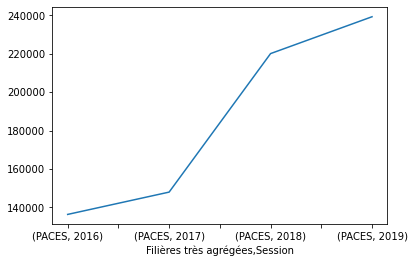

In [82]:
df = dataframe.loc[dataframe['Filières très agrégées'] == 'PACES']
#df.groupby(['Filières très agrégées', 'Session'])['Admis'].sum().plot()

df.groupby(['Filières très agrégées', 'Session'])['Effectif total des candidatures'].sum().plot()

In [73]:
fig = px.histogram(dataframe, x = dataframe['Session'], y = dataframe['Effectif total des candidatures'], color = 'Filière de formation')
fig.update_layout(bargap = 0.2)

<AxesSubplot:xlabel='Session'>

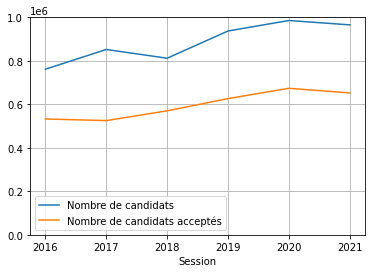

In [112]:
TotalNb = candidatesNbDf.plot(x = 'Session', y = 'Nombre de candidats')

dataframe.groupby(['Session'])['Admis'].sum().reset_index(name = 'Nombre de candidats acceptés').plot(ax = TotalNb, x = 'Session', y = 'Nombre de candidats acceptés', ylim = [0, 1000000], grid = True)